<a href="https://colab.research.google.com/github/ChristianJoudon/ChristianJoudon.github.io/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://world.openfoodfacts.org/api/v0/product/5060292302201.json

--2024-10-17 19:16:12--  https://world.openfoodfacts.org/api/v0/product/5060292302201.json
Resolving world.openfoodfacts.org (world.openfoodfacts.org)... 213.36.253.214
Connecting to world.openfoodfacts.org (world.openfoodfacts.org)|213.36.253.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘5060292302201.json’

5060292302201.json      [ <=>                ]  37.08K  --.-KB/s    in 0s      

2024-10-17 19:16:13 (259 MB/s) - ‘5060292302201.json’ saved [37967]



In [ ]:
import json
import time

# Start timing the processing
start_time = time.time()

# Load the product data
product_info = json.loads(open('./5060292302201.json').read())

# List to store top ingredients
top_ingredients_list = []

# Get the list of ingredients
ingredients = product_info['product']['ingredients']

# Check if there are ingredients
if ingredients:
    # Sort ingredients by percentage
    sorted_ingredients = sorted(ingredients, key=lambda x: x.get('percent_estimate', 0), reverse=True)

    # Get the top 5 ingredients
    top_5 = sorted_ingredients[:5]

    # Get product ID
    product_id = product_info.get('code', 'unknown ID')

    # Get ingredient names
    ingredient_names = [ing.get('text', 'unknown ingredient') for ing in top_5]

    # Add product and ingredients to the list
    top_ingredients_list.append((product_id, ingredient_names))

    # Print the top 5 ingredients
    print("Top 5 Ingredients:")
    for ing in top_5:
        name = ing.get('text', 'unknown ingredient')
        percent = ing.get('percent_estimate', 0)
        print(f"- {name}: {percent}%")
else:
    print("No ingredients found for this product.")

# Write the results to a TSV file
with open('ingredient_by_product.tsv', 'w') as tsvfile:
    tsvfile.write('product ID	top 5 ingredients')
    for product_id, ingredients in top_ingredients_list:
        tsvfile.write(f"{product_id}	{', '.join(ingredients)}")

# End timing the processing
end_time = time.time()
print(f"Time taken to process the file: {end_time - start_time:.2f} seconds")

Top 5 Ingredients:
- potatoes: 54%
- sunflower oil: 28.75%
- seasoning: 8.625%
- rice flour: 4.3125%
- potato starch: 4.3125%
Time taken to process the file: 0.01 seconds


In [ ]:
### Additional Requirements:

- Try to implement a solution using Python's multiprocessing library to speed up the process: [multiprocessing documentation](https://docs.python.org/3/library/multiprocessing.html).
- Note how long it took to process the data with your solution.


SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-4-b1df67c03e71>, line 3)

--2024-10-09 07:33:15--  https://world.openfoodfacts.org/api/v0/product/5060292302201.json
Resolving world.openfoodfacts.org (world.openfoodfacts.org)... 213.36.253.214
Connecting to world.openfoodfacts.org (world.openfoodfacts.org)|213.36.253.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘5060292302201.json’

5060292302201.json      [ <=>                ]  37.08K  --.-KB/s    in 0s      

2024-10-09 07:33:16 (239 MB/s) - ‘5060292302201.json’ saved [37967]



## Question 2: Working with Spark RDDs

In this part of the assignment, you'll work with RDDs to manually process the data in a way that is common in Natural Language Processing -- here, you'll execute queries on a dataset of tweets.

Before starting, upload the dataset (`tweets.csv`) to the Databricks community infrastructure using an approach of your choice. The zipped archive containing the file `tweets.csv` can be downloaded [here](https://www.dropbox.com/s/rdvyd2endi7fwsa/tweet_info.zip?dl=1).



The dataset contains six fields, including the tweet's timestamp (field 2) and the tweet content (field 6).

Each question has one or more assert statements, which must pass for the question to be graded. Only libraries from the provided import list can be used — pandas and other external libraries are not allowed.

Your solution needs to pass asserts to be considered correct.



In [ ]:
### Question 2.1

Develop a function called `split_single_csv_line` that accepts a string representing a single CSV entry and splits it into its respective fields. Keep in mind that while fields are typically separated by commas, they may also contain commas within them, so your function should handle that correctly.


In [ ]:
# Function to split CSV line using Python's csv module
def split_single_csv_line(line):
    from io import StringIO
    reader = csv.reader(StringIO(line))
    return next(reader)

In [ ]:
# Test cases
my_line = '"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"'

assert len(split_single_csv_line(my_line)) == 6
assert split_single_csv_line(my_line)[1] == "1467810369"

print(split_single_csv_line(my_line))


['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY', '_TheSpecialOne_', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]


### Question 2.2

Load the 'tweets.txt' dataset into an RDD named tweets_rdd, ensuring that each item represents a distinct tweet object. You have the flexibility to structure each tweet object in any format you prefer, such as a tuple, dictionary, or list. However, note that storing each tweet as a single string will be considered incorrect.


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=0ff27afac1dbca5d7a8e4fc9a0c4838b438c31101e8f6ce39be9d2d62ef166df
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

# Load the tweets.csv file into an RDD
tweets_rdd = sc.textFile("tweets.csv")

tweets_rdd = tweets_rdd.map(split_single_csv_line)
tweets_rdd.take(1)




[['0',
  '1467810369',
  'Mon Apr 06 22:19:45 PDT 2009',
  'NO_QUERY',
  '_TheSpecialOne_',
  "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]]

In [ ]:
import pyspark
# Test your solution
assert type(tweets_rdd) is pyspark.rdd.PipelinedRDD
assert tweets_rdd.count() == 1_600_000

first_record = tweets_rdd.take(1)[0]
assert len(first_record) == 6
assert first_record[1] == '1467810369'

In [ ]:
### Question 2.3

#* Apply the provided function to sanitize the tweets located in the 6th field of the input data.
#* Remove any unwanted symbols, links, or special characters from the tweets, and store the cleaned results in a new RDD called clean_tweets_rdd.
#* Ensure that clean_tweets_rdd contains only the cleaned tweet texts, without any of the other fields.


In [ ]:
import csv
from io import StringIO
# Function to split CSV line using Python's csv module
def split_single_csv_line(line):
    reader = csv.reader(StringIO(line))
    return next(reader)

# Load the tweets.csv file into an RDD
tweets_rdd = sc.textFile("tweets.csv")

# Split each line using the updated split_single_csv_line function
tweets_rdd = tweets_rdd.map(split_single_csv_line)
print("First record after splitting CSV line:", tweets_rdd.take(1)[0])

# Super simple clean function to grab the 6th element (tweet text)
def simple_clean_tweet(fields):
    if len(fields) > 5:
        return fields[5]
    else:
        return ""  # Return empty string for missing tweets

# Apply the super simple cleaning function to the RDD
tweets_text_rdd = tweets_rdd.map(simple_clean_tweet)

# Function to clean tweet text (unchanged)
def clean_tweet_text(text):
    import re
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove @ symbol but keep the mention word
    text = re.sub(r'@(\w+)', r'\1', text)

    # Replace specific words like 'awww' with 'a'
    text = re.sub(r'\baw+\b', 'a', text)

    # Replace apostrophes with spaces (to split contractions)
    text = re.sub(r"'", ' ', text)

    # Remove special characters except spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra spaces
    text = ' '.join(text.split())

    return text

# Apply the revised cleaning function to the RDD
clean_tweets_rdd = tweets_text_rdd.map(clean_tweet_text)
first_tweet = clean_tweets_rdd.take(1)[0]
print("First cleaned tweet:", first_tweet)


First record after splitting CSV line: ['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY', '_TheSpecialOne_', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]
First cleaned tweet: switchfoot a that s a bummer you shoulda got david carr of third day to do it d


In [ ]:
# Test your solution
assert clean_tweets_rdd.count() == 1_600_000
first_tweet = clean_tweets_rdd.take(1)[0]
assert first_tweet == 'switchfoot a that s a bummer you shoulda got david carr of third day to do it d'


In [ ]:
### Question 2.4

Transform the clean_tweets_rdd into an RDD where each element is a list of words extracted from a tweet. Call this RDD tweets_words_rdd.

The transformation should ensure that each tweet is split into words, so the first element in tweets_words_rdd contains exactly 18 words. The first 9 words of the first tweet should match the following sequence:



In [ ]:
# Transform the clean_tweets_rdd into an RDD of words lists (tweets_words_rdd)
tweets_words_rdd = clean_tweets_rdd.map(lambda tweet: tweet.split())

# Show the first few elements of the tweets_words_rdd
print(tweets_words_rdd.take(1))



[['switchfoot', 'a', 'that', 's', 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']]


In [ ]:
# Test your code
first_entry_words = tweets_words_rdd.take(1)[0]
assert len(first_entry_words) == 18
assert first_entry_words[0:9] == ['switchfoot',
 'a',
 'that',
 's',
 'a',
 'bummer',
 'you',
 'shoulda',
 'got']


In [ ]:
### Question 2.5

Stop words, though important in human language, often carry little meaning in natural language processing and are typically removed to improve processing efficiency. Your task is to eliminate stop words from the tweet word lists in tweets_words_rdd. This step is crucial for cleaning and preparing the data for further analysis.

You have access to a predefined list of common English stop words stored in a Python list called stop_words. You may expand this list as needed.

Once you have removed the stop words, store the cleaned data in a new variable called filtered_tweets_words_rdd.


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/mahdi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import stopwords and remove them from tweets_words_rdd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from tweets_words_rdd
filtered_tweets_words_rdd = tweets_words_rdd.map(lambda words: [word for word in words if word not in stop_words])

# Show the first few elements of the filtered_tweets_words_rdd
print(filtered_tweets_words_rdd.take(1))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['switchfoot', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']]


In [ ]:
# Test your solution
filtered_words_first_entry = filtered_tweets_words_rdd.take(1)[0]
assert len(filtered_words_first_entry) == 8
assert filtered_words_first_entry[0] == "switchfoot"
assert filtered_words_first_entry[1] == "bummer"
assert "a" not in filtered_words_first_entry


In [ ]:
### Question 2.6

- What is the median tweet length (excluding stop words)?
- Count the number of words in each tweet (excluding stop words) and display the distribution as a histogram.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['switchfoot', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']]
Median tweet length (excluding stop words): 7.0


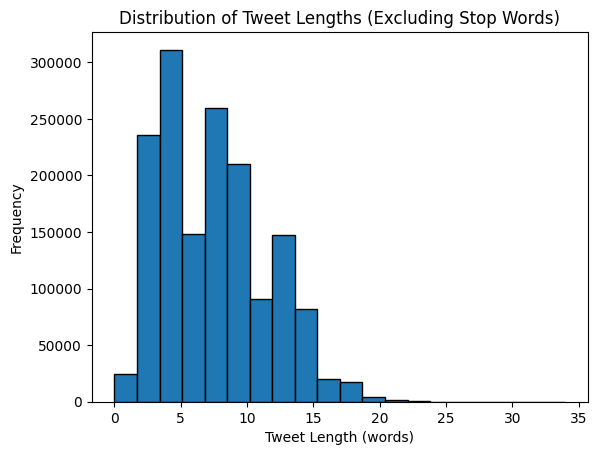

In [ ]:

# Question 2.6
import numpy as np

# Calculate tweet lengths
tweet_lengths_rdd = filtered_tweets_words_rdd.map(lambda words: len(words))

# Collect tweet lengths to calculate median
tweet_lengths = tweet_lengths_rdd.collect()
median_length = np.median(tweet_lengths)
print(f"Median tweet length (excluding stop words): {median_length}")

# Plot histogram of tweet lengths
import matplotlib.pyplot as plt

plt.hist(tweet_lengths, bins=20, edgecolor='black')
plt.xlabel('Tweet Length (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths (Excluding Stop Words)')
plt.show()


In [ ]:
# test your solution

filtered_words_first_entry = filtered_tweets_words_rdd.take(1)[0]
assert len(filtered_words_first_entry) == 8
assert filtered_words_first_entry[0] == "switchfoot"
assert filtered_words_first_entry[1] == "bummer"
assert "a" not in filtered_words_first_entry[1]

In [ ]:
### Question 2.7

What are the 10 most common words (case-insensitive) used in the tweets?


In [ ]:
### Write your code here
from collections import Counter

# Flatten the filtered_tweets_words_rdd and count word frequencies
all_words_rdd = filtered_tweets_words_rdd.flatMap(lambda words: words)
word_counts = all_words_rdd.map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)

# Collect word counts and find the 10 most common words
word_counts_sorted = word_counts.sortBy(lambda x: x[1], ascending=False)
top_10_words = word_counts_sorted.take(10)
print("Top 10 most common words:")
for word, count in top_10_words:
    print(f"{word}: {count}")


Top 10 most common words:
good: 85756
day: 80164
get: 79127
like: 75538
go: 71221
today: 63840
going: 62282
work: 61675
love: 60719
got: 59076


In [ ]:
### Question 2.8: Sentiment Analysis with TextBlob

In the cell below, an example is provided showing how to use the `TextBlob` library to estimate the polarity of sentiment in a text. While `TextBlob` works on any text, your task is to use it to compute the sentiment of the cleaned-up tweets from earlier.


#### Instructions:
1. Install the `TextBlob` library using:
   ```python
   %pip install textblob
   ```
2. Use `TextBlob` to calculate the sentiment polarity of each tweet. Polarity values range from -1 (negative sentiment) to 1 (positive sentiment).

3. Split the tweets into sentiment categories based on their polarity score. You can define the categories as you see fit (e.g., highly negative, negative, neutral, positive and highly positive.)

4. Plot the distribution of the sentiment categories using a bar chart or histogram, with the categories on the x-axis and the number of tweets falling into each category on the y-axis.

#### Example:
Here is an example of how `TextBlob` works on sample text:

```python
from textblob import TextBlob

text = "What a wonderful movie"
print(text, "\t", TextBlob(text).sentiment.polarity)

text = "Definitely not my type of movie"
print(text, "\t", TextBlob(text).sentiment.polarity)

text = "What a horrible movie"
print(text, "\t", TextBlob(text).sentiment.polarity)

>>> What a wonderful movie 	 1.0
>>> Definitely not my type of movie 	 0.0
>>> What a horrible movie 	 -1.0
```

Now, apply this approach to the cleaned tweets and create a plot showing the distribution of the sentiment categories. Keep in mind that this is a large dataset, so you should leverage your understanding of big data processing techniques to efficiently compute the sentiment polarity for each tweet.


In [ ]:
pip install textblob

In [ ]:
### Write your code here

# Question 2.8: Sentiment Analysis with TextBlob
from textblob import TextBlob

# Function to compute sentiment polarity of each tweet
def compute_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each tweet
sentiments_rdd = clean_tweets_rdd.map(compute_sentiment)

# Categorize sentiments
def categorize_sentiment(polarity):
    if polarity < -0.5:
        return 'Highly Negative'
    elif -0.5 <= polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    elif 0 < polarity <= 0.5:
        return 'Positive'
    else:
        return 'Highly Positive'

sentiment_categories_rdd = sentiments_rdd.map(categorize_sentiment)

# Count the number of tweets in each sentiment category
sentiment_distribution = sentiment_categories_rdd.map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b).collect()

# Plot the distribution of sentiment categories
categories, counts = zip(*sentiment_distribution)
plt.bar(categories, counts, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Categories')
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# No asserts provided for this question

### Question 3: Working With Spark DataFrames

In this section, we'll be using Spark DataFrames to explore two datasets:

1. **Dataset: `tweet_info.csv`**
   This file provides a snapshot of tweet activity over a month. Key details include:
   - `TweetID`: The unique ID of the tweet.
   - `UserID`: The unique ID of the user who tweeted.
   - `FirstRetweet`: The time when the tweet received its first retweet.
   - `PostTime`: The time when the tweet was posted.
   - `Hashtags`: The hashtags used in the tweet.
   - `Retweets`: The total number of retweets.
   - `Likes`: The total number of likes.
   - `DayOfWeek`: The day of the week the tweet was posted.
   - `IsPromoted`: Indicates if the tweet was promoted (0 for no, 1 for yes).

2. **Dataset: `user_info.csv`**
   This file contains information about the users:
   - `UserID`: The unique ID of the user.
   - `Username`: The user's display name.
   - `Followers`: The number of followers the user has.
   - `Following`: The number of accounts the user follows.
   - `AccountCreationDate`: The date the user created their account.   

one has user id one has user id and user name. you are supposed to use join

### Question 3.1

Load `tweet_info.csv` into a Spark `DataFrame` called `tweet_data`. The zipped archive containing the file `tweet_info.csv` can be downloaded [here](https://www.dropbox.com/s/rdvyd2endi7fwsa/tweet_info.zip?dl=1).

In [ ]:
### Write your code here
from pyspark.sql import SparkSession

# Initialize Spark session using the provided method
spark = SparkSession(sc)

# Load tweet_info.csv into a Spark DataFrame called tweet_data
tweet_data = spark.read.csv("user_info.csv", header=True, inferSchema=True)

In [ ]:
# Test your solution
assert type(tweet_data) is pyspark.sql.dataframe.DataFrame


In [ ]:
### Question 3.2

How many unique users are in the tweet_data DataFrame? Keep in mind that a user may have more than one tweet in the file. Save the result in a variable called nb_unique_users.


In [ ]:
### Write your code here
# Count the number of unique users
nb_unique_users = tweet_data.select("UserID").distinct().count()

# Print the result
print(f"Number of unique users: {nb_unique_users}")

Number of unique users: 1000


In [ ]:
# Test your code
assert type(nb_unique_users) is int
assert nb_unique_users <= 1000
assert 0 < nb_unique_users

In [ ]:
# Load the datasets
tweet_info_df = spark.read.csv('tweet_info.csv', header=True, inferSchema=True)
user_info_df = spark.read.csv('user_info.csv', header=True, inferSchema=True)

# Join tweet_info_df with user_info_df on UserID to get Username
tweets_with_usernames_df = tweet_info_df.join(user_info_df, on='UserID')

# Filter for promoted tweets (IsPromoted = 1)
promoted_tweets_df = tweets_with_usernames_df.filter(tweets_with_usernames_df.IsPromoted == 1)

# Group by Username and count the number of promoted tweets
promoted_count_df = promoted_tweets_df.groupBy('Username').count()

# Rename the count column to NbPromoted
promoted_count_df = promoted_count_df.withColumnRenamed('count', 'NbPromoted')

# Sort the results by NbPromoted in descending order
promoted_count_df = promoted_count_df.orderBy(promoted_count_df.NbPromoted.desc())

# Show the final result
promoted_count_df.show()


+----------------+----------+
|        Username|NbPromoted|
+----------------+----------+
|lambertalexander|        11|
|           brios|        10|
|     kelseyclark|        10|
|     colinwillis|        10|
|         jayrose|        10|
|     fishermegan|         9|
|       timothy64|         9|
| hernandezmartin|         9|
|       qmcdonald|         8|
|   michellebrown|         8|
|     richardcole|         8|
|     christian85|         8|
|         staylor|         7|
|         jenna83|         7|
|            zlee|         7|
|           xwebb|         7|
|   michaelwalter|         7|
|          fred87|         7|
|       michael23|         7|
|        halljohn|         7|
+----------------+----------+
only showing top 20 rows



In [ ]:
### Write your code here

In [ ]:
# No asserts provided for this question

### Question 3.4

Determine how many tweets each user had that were retweeted within 24 hours of posting. Associate this count with the respective `Username`, which can be found in the `user_info.csv` file. The zipped archive containing the file `user_info.csv` can be downloaded [here](https://www.dropbox.com/s/rdvyd2endi7fwsa/tweet_info.zip?dl=1).

The final output should display each user's `Username` alongside the count of their tweets that were retweeted within 24 hours.

Store the result in a variable called `tweets_count`. This variable should contain two columns: `Username` and `CountRetweeted24h`, and should be sorted by `CountRetweeted24h` in decreasing order.


In [ ]:
# write your code here
from pyspark.sql import functions as F

# Load the datasets
tweet_info_df = spark.read.csv('tweet_info.csv', header=True, inferSchema=True)
user_info_df = spark.read.csv('user_info.csv', header=True, inferSchema=True)

# Convert timestamps to Unix time and calculate the difference in hours
tweets_with_time_diff_df = tweet_info_df.withColumn(
    'TimeDiffHours',
    (F.unix_timestamp('FirstRetweet') - F.unix_timestamp('ActualPostTime')) / 3600
)

# Filter tweets where the TimeDiffHours is <= 24
tweets_within_24h_df = tweets_with_time_diff_df.filter(tweets_with_time_diff_df.TimeDiffHours <= 24)

# Join the filtered tweets with user_info_df to get the Username
tweets_with_usernames_df = tweets_within_24h_df.join(user_info_df, on='UserID')

# Group by Username and count the number of tweets retweeted within 24 hours
tweets_count = tweets_with_usernames_df.groupBy('Username').count()

# Rename the count column to CountRetweeted24h
tweets_count = tweets_count.withColumnRenamed('count', 'CountRetweeted24h')

# Sort the results by CountRetweeted24h in decreasing order
tweets_count = tweets_count.orderBy(tweets_count.CountRetweeted24h.desc())

# Show the final result
tweets_count.show()


+----------------+-----------------+
|        Username|CountRetweeted24h|
+----------------+-----------------+
|         jenna83|                8|
|         susan47|                7|
|lambertalexander|                7|
|     kelseyclark|                7|
|           brios|                6|
|         ohoward|                6|
|     colinwillis|                6|
|   williamsdavid|                6|
|      lindawoods|                6|
|         rbarron|                6|
|        proberts|                6|
|         jayrose|                6|
|      carolweeks|                5|
|    ramosrebecca|                5|
|      virginia90|                5|
|     trevorbrown|                5|
|         wayne46|                5|
|     christian85|                5|
|         staylor|                4|
|       fmartinez|                4|
+----------------+-----------------+
only showing top 20 rows



In [ ]:
# test your code
assert tweets_count.take(1)[0][0] == 'jenna83'
assert tweets_count.take(1)[0][1] == 8

In [ ]:
### Question 3.5

#Analyze tweeting patterns across different days of the week. Specifically, for each day, determine how many of each user's tweets were retweeted within 24 hours of posting. For example, if a tweet was posted on Monday evening and retweeted before the same time on Tuesday, it should be counted toward Monday's total for that user.

#**Hint:** Use the `date_format` function to extract the day of the week from a timestamp, using the format 'EEEE' for the full day name. Also, to determine if a tweet was retweeted within 24 hours, compare the `PostTime` with the `FirstRetweet` time and ensure the retweet occurred within 24 hours.

#Save your results in a variable called `result`, which should have three columns: `Username`, `DayOfWeek`, and `CountRetweeted24h`. Sort the results by `Username` first, and then by `DayOfWeek` (Monday to Sunday).

from pyspark.sql import functions as F

# Load the datasets
tweet_info_df = spark.read.csv('tweet_info.csv', header=True, inferSchema=True)
user_info_df = spark.read.csv('user_info.csv', header=True, inferSchema=True)

# Convert timestamps to Unix time and calculate the difference in hours
tweets_with_time_diff_df = tweet_info_df.withColumn(
    'TimeDiffHours',
    (F.unix_timestamp('FirstRetweet') - F.unix_timestamp('ActualPostTime')) / 3600
)

# Filter tweets where the TimeDiffHours is <= 24 (retweeted within 24 hours)
tweets_within_24h_df = tweets_with_time_diff_df.filter(tweets_with_time_diff_df.TimeDiffHours <= 24)

# Extract the day of the week from the ActualPostTime
tweets_with_day_df = tweets_within_24h_df.withColumn(
    'DayOfWeek', F.date_format('ActualPostTime', 'EEEE')
)

# Join the tweets with the user information to get the Username
tweets_with_usernames_df = tweets_with_day_df.join(user_info_df, on='UserID')

# Group by Username and DayOfWeek and count the number of tweets retweeted within 24 hours
result = tweets_with_usernames_df.groupBy('Username', 'DayOfWeek').count()

# Rename the count column to CountRetweeted24h
result = result.withColumnRenamed('count', 'CountRetweeted24h')

# Sort the results by Username and DayOfWeek (Monday to Sunday)
result = result.orderBy('Username', F.expr(
    "CASE DayOfWeek WHEN 'Monday' THEN 1 WHEN 'Tuesday' THEN 2 WHEN 'Wednesday' THEN 3 "
    "WHEN 'Thursday' THEN 4 WHEN 'Friday' THEN 5 WHEN 'Saturday' THEN 6 WHEN 'Sunday' THEN 7 END"
))

# Show the final result
result.show()


+----------------+---------+-----------------+
|        Username|DayOfWeek|CountRetweeted24h|
+----------------+---------+-----------------+
|       abuchanan|   Sunday|                3|
|         ahughes|Wednesday|                1|
|         ahughes|   Friday|                2|
|     baileyerica|Wednesday|                1|
|     baileyerica| Saturday|                2|
|     baileyerica|   Sunday|                1|
|      benjamin14|  Tuesday|                1|
|      benjamin14| Thursday|                1|
|           brios| Thursday|                1|
|           brios|   Friday|                3|
|           brios| Saturday|                1|
|           brios|   Sunday|                1|
|    brookstamara|   Monday|                1|
|    brookstamara| Thursday|                1|
|    brookstamara|   Friday|                1|
|buchanankimberly|   Monday|                1|
|buchanankimberly|   Sunday|                2|
|candacerodriguez|   Monday|                1|
|candacerodri

In [ ]:
# write your code here

In [ ]:
# No asserts provided for this question

### Question 4 (BONUS 5pts)

In the most recent pracitical, we explored how to sample data points in a two-dimensional space by dividing the space into grid cells, identifying the grid cell each point belongs to, and then selectively sampling a fixed number of points from each cell. For this task, you will extend this approach to a three-dimensional space and implement using the PySpark framework, follow these steps:

	1.	Create a dataset of at least 1,000,000 points, where each point is represented by its coordinates in 3D space.
	2.	Instead of using simple (x, y) coordinates to create the grid, define a grid based on an arbitrary vector that generates the first axis -- don not pick , and use an orthogonal vector to generate the second axis. You will need to determine how to create the third orthogonal axis to complete the grid.
      * When selecting the first vector to define your grid, do not choose vectors that are aligned with the coordinate axes of the Euclidean space. In other words, avoid vectors like (a, 0, 0), (0, b, 0), or (0, 0, c), which correspond directly to the x, y, or z axes.
	3.	For each grid cell, sample any fixed number of points you deem reasonable.
	4.	As we practiced in class, develop your solution incrementally. Start by generating the points, then develop the logic for assigning them to the appropriate grid cells, and finally implement the selective sampling process.

Hints:
	•	Use PySpark’s transformation functions like map, filter, and groupBy to help manage the large dataset and grid sampling efficiently.



In [ ]:
# write your code here

from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize Spark session
spark = SparkSession.builder.appName('3DGridSampling').getOrCreate()

# Generate 1,000,000 random points in 3D space
points_df = spark.range(1000000).select(
    F.rand().alias('x'),
    F.rand().alias('y'),
    F.rand().alias('z')
)

